# Plotly Dash 

In this notebook we will see how to create intercative python dashboard with Plotly Dash

### What is Dash? 

- **Dash is Python framework that is usefull to create web application and dashboards.** 
It was developed by the same company that built the data visulization library plotly, dash is built on in it, making easy to integrate ploty charts into a dashboard base on dash 

- **Dash is built on top of Plotly, Flask and React**, thanks to that we can build web applications in just Python with dash.


### To whom is dash useful?

Dash could benefit anyone who wants to build dashboards conveniently, but it is in particular useful for data analysts or data scientists that are already familiar with Python who wants to build apps to share the insights.

### Why Dash? 

- Various data visualizations to dashboards 
- Interactive 
- Highly customizable 
- Easy to share 
- Open source 


## Dash app components 

There are 2 main component for every dash app: 

- **Layout**
- **Intercative features**: 

### Layout

Layout contains different components and it determines how the dashboard looks. Example of these viasual components are Headings, plots, dropdown menus, ecc...

- Dash layout has a structure as a tree of components

- Dash  allows us to build these components with 2 modules: 

    - **Dash HTML components module:** It is refered as **dash.html** and it define the structure of the web content using HTML. 
    Whitin the dashboard the building blocks are HTML elements. Here some usefull examples: 
        -  Sections headings (different levels): h1, h2, h3, h4, h5, h6
        - Paragraph: p
        - Content division: div (It is used as a container to group other HTML elment in one section)
        - Line break: br
        - Anchor element: a (It is used to create an hyperlink to other web pages)
        
            Even if the module rely on HTML, we don't have to write any HTML code when creating wep apps using dash, the module already has a component for each HTML tag. Nevertheless  it is still usefull to know some HTML basics.
    - **Dash Core components module**: It is refered as **dash.dcc**. It can be used to build higher level components, that are more complicated and can be interactive. These components are written in JavaScript, HTML, and CSS, but thanks to Dash we can use these components without much knowledge abou them.  

    Example of core components are:
    - Dropdowns: dcc.dropdpwn 
    - Radio items: dcc.RadioItems 
    - Graphs: dcc.Graph 
    - Text input boxes: dcc.Input 

### Intercative features

The so called 'Intercative features' part handles the part that makes the dashboard interactive, this is done by the **callback functions**, which defines how the users can interact with the dashboard. 
(We'll see more on this later)




## Let's create our first Dashboard 

With a focus on the html Layout part 

In [181]:
from dash import Dash, html 


#Instantiate a Dash object 
app = Dash()

#Defining the Layout part 
app.layout = html.Div(children= [
    html.H1(children='Title'),
    html.P(children=['Paragraph', 
                     html.Br(),
                     html.A(children= 'Link',
                            href = 'https://dash.plotly.com/dash-in-jupyter',
                            target = '_blank')])#this is to open a new webpage when the link is clicked 
    
])



In [182]:
app.run(jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/


 The Children property is usually the first attribute of those components.  This means we can remove the Children equal from these HTML components. This makes the code look cleaner.

## Let's add some **Core componets**

In [49]:
data = pd.read_csv('world_happiness.csv')
data

,country,region,happiness_rank,happiness_score,year
0,Australia,Australia and New Zealand,10,7.284,2015
1,Australia,Australia and New Zealand,9,7.313,2016
2,Australia,Australia and New Zealand,10,7.284,2017
3,Australia,Australia and New Zealand,10,7.272,2018
4,Australia,Australia and New Zealand,11,7.228,2019
...,...,...,...,...,...
1083,Botswana,Sub-Saharan Africa,142,3.471,2022
1084,Rwanda,Sub-Saharan Africa,143,3.268,2022
1085,Zimbabwe,Sub-Saharan Africa,144,2.995,2022
1086,Lebanon,Middle East and Northern Africa,145,2.955,2022


In [183]:
from dash import Dash, html, dcc
import pandas as pd
import plotly.express as px

data = pd.read_csv('world_happiness.csv')

#line_fig = px.line(data[data['country']== data['country'].unique()[0]], x ='year', y = 'happiness_score', title = 'Happiness Score')

#Instantiate a Dash object 
app = Dash()

#Defining the Layout part 

app.layout = html.Div([
    html.H1('Title'),
    html.P(['Paragraph', 
                     html.Br(),
                     html.A(children= 'Link',
                            href = 'https://dash.plotly.com/dash-in-jupyter',
                            target = '_blank')]),#this is to open a new webpage when the link is clicked 
    dcc.RadioItems(options = data['region'].unique(), value = data['region'].unique()[0]), 
    dcc.Dropdown(options = data['country'].unique(), value = data['country'].unique()[0]),
    dcc.Graph(figure = px.line(data[data['country']== data['country'].unique()[0]], x ='year', y = 'happiness_score', title = 'Happiness Score'))
     



])

In [184]:
app.run(jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/


## Interactive Features 

As we already mentioned it is the part of the code tha makes the dashboard interactive.

To make the dashbard interactive we rely on the **callback functions**

### Callback Functions 

They are a special python functions, particularly designed for Dash, with unique caractheristics.

- The inputs and outputs for the callbacks functions are properties of dash components. (Dash components have properties such as children o html.Div, options and value of dcc.Dropdown, figure of dcc.Graph)
- The callback functions are automatically called by Dash, this happens whenever its input components property changes (i.e. when the user changes tha inputs tha outpus change automatically).




#### Calback Syntax
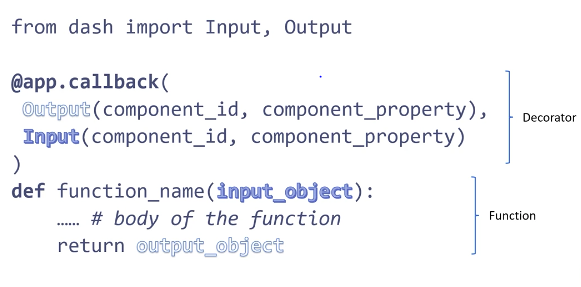


- Inside the decorator, we specify the outputs and inputs objects of the callback function. We must put the output items before the input items.

 - Since both output and input are dash components as properties  we use component id and component property to specify them.

        The ID component is an ID or name to identify each unique component and we must set them when creating the components. There are two main ways to set the ids. First, we could assign a dash components ID property as a unique name in the app layout and let this component id equal to that ID property. Also, we can assign a dash component as a variable and feed such variable as a component id.

- Within the body of the function based on the input, we can do all kinds of things such as filtering data, calculating metrics, generating plots and so on.
Play video starting at :5:37 and follow transcript5:37
Whenever this input or input components property changes dash automatically calls this function to update and return the output.

## Let's create our first interactive dashboard  

We want to have the graph updated based on the selection of the country in the dropdown.

In [186]:
from dash import Dash, html, dcc, Input, Output
import pandas as pd
import plotly.express as px

data = pd.read_csv('world_happiness.csv')


#Instantiate a Dash object 
app = Dash()

#Defining the Layout part 




app.layout = html.Div([
    html.H1('Happiness Dashboard'),
    html.P(['Paragraph', 
                     html.Br(),
                     html.A(children= 'Link',
                            href = 'https://dash.plotly.com/dash-in-jupyter',
                            target = '_blank')]),#this is to open a new webpage when the link is clicked 
    dcc.RadioItems( options = data['region'].unique(), 
                    value = data['region'].unique()[0],), 
    dcc.Dropdown( id = 'country_dropdown',
                 options = data['country'].unique(), 
                 value = data['country'].unique()[0]),
    dcc.Graph(id = 'Graph')
     ])

@app.callback(
    Output(component_id='Graph', component_property= 'figure'),
    Input(component_id='country_dropdown', component_property= 'value' )
)
def update_graph(country):
    filtered_data = data[data['country']== country]
    figure = px.line(filtered_data, x ='year', y='happiness_score',
                     title = f'Happines Score in {country}')
    return figure

- The output is this graph
- The input is the value property of the country dropdown

Notice how in the dcc.Graph component we remove the 'figure' parameter, this because the figure property is now automtically updated in the callback function, based on the dropdown menu. 

In [187]:
app.run(jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/


### Callback with multiple Inputs & Outputs 

The number of input objects in the decorator must be the same of parameters passed as arguments of in the function and the order must be the same. Similarly, since there are multiple output objects in the decorator, there should be the same number of outputs returned by the function in the same order. 

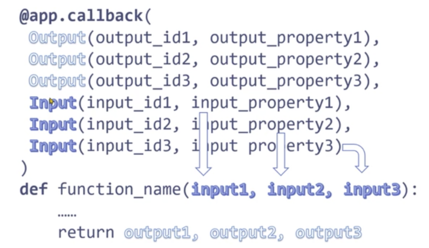

Whenever one of these inputs changes, the callback function will run and update the outputs

In [188]:
from dash import Dash, html, dcc, Input, Output
import pandas as pd
import plotly.express as px

data = pd.read_csv('world_happiness.csv')


#Instantiate a Dash object 
app = Dash()

#Defining the Layout part 


#line_fig = px.line(data[data['country']== data['country'].unique()[0]], x ='year', y = 'happiness_score', title = 'Happiness Score')

app.layout = html.Div([
    html.H1('Happiness Dashboard'),
    html.P(['Paragraph', 
                     html.Br(),
                     html.A(children= 'Link',
                            href = 'https://dash.plotly.com/dash-in-jupyter',
                            target = '_blank')]),#this is to open a new webpage when the link is clicked 
    dcc.Dropdown( id = 'country_dropdown',
                 options = data['country'].unique(), 
                 value = data['country'].unique()[0]),
    dcc.RadioItems(id = 'Score_type', options={#previously we use a list to define the options, but it is also possible to do it with dictionaries
        'happiness_score': 'Happines Score',
        'happiness_rank' : 'Happiness Rank'}, value='happiness_score' ),                                         
    dcc.Graph(id = 'Graph'),
    html.P(id='avarage-div')
     ])

@app.callback(
    Output(component_id='Graph', component_property= 'figure'),
    Output(component_id = 'avarage-div', component_property = 'children'),
    Input(component_id='country_dropdown', component_property= 'value' ),
    Input(component_id= 'Score_type', component_property= 'value')
)
def update_graph(country, selected_score):
    filtered_data = data[data['country']== country]
    figure = px.line(filtered_data, x ='year', y=selected_score,
                     title = f'{selected_score} in {country}')
    selected_avarage = filtered_data[selected_score].mean()
    return figure, f'The avarge {selected_score} selected_avarage for {country} is {selected_avarage}'

In [189]:
app.run(jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/


### Chaining Callbacks' Inputs and Outputs

**What are chain callbacks?** When the output of one callback function is also the input of another callback function.

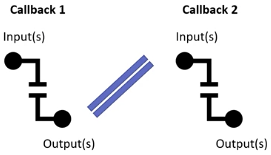

**Note:**   since each callback can have multiple inputs or outputs as long as one of the outputs of callback 1 is the same as one of the callback 2 inputs. These two callbacks are chained.

Let's see how this can be usefull.

Previously, you've created a dashboard like this. When the users want to find out about the happiness measure for a specific country, they have to use a dropdown and go through a long list of countries.

What if they want to see a country within a specific region? Is there a way to help them filter for that? 

In [190]:
from dash import Dash, html, dcc, Input, Output
import pandas as pd
import plotly.express as px

data = pd.read_csv('world_happiness.csv')


#Instantiate a Dash object 
app = Dash()

#Defining the Layout part 


#line_fig = px.line(data[data['country']== data['country'].unique()[0]], x ='year', y = 'happiness_score', title = 'Happiness Score')

app.layout = html.Div([
    html.H1('Happiness Dashboard'),
    html.P(['Paragraph', 
                     html.Br(),
                     html.A(children= 'Link',
                            href = 'https://dash.plotly.com/dash-in-jupyter',
                            target = '_blank')]),#this is to open a new webpage when the link is clicked 
    dcc.RadioItems(id = 'region_radio', options= data['region'].unique(), value = 'North America'),
    dcc.Dropdown( id = 'country_dropdown'), #we remove options and value becuse they will be automatically assigned by the callback function. 
    dcc.RadioItems(id = 'Score_type', options={#previously we use a list to define the options, but it is also possible to do it with dictionaries
        'happiness_score': 'Happines Score',
        'happiness_rank' : 'Happiness Rank'}, value='happiness_score' ),                                         
    dcc.Graph(id = 'Graph'),
    html.Div(id='avarage-div')
     ])

@app.callback(
    Output(component_id='country_dropdown', component_property= 'options'),
    Output(component_id = 'country_dropdown', component_property = 'value'),
    Input(component_id='region_radio', component_property= 'value' )      
) 
def update_dropdown(selected_region):
    filtered_data = data[data['region']== selected_region] 
    country_options = filtered_data['country'].unique()
    return country_options, country_options[0]


@app.callback(
    Output(component_id='Graph', component_property= 'figure'),
    Output(component_id = 'avarage-div', component_property = 'children'),
    Input(component_id='country_dropdown', component_property= 'value' ),
    Input(component_id= 'Score_type', component_property= 'value')
)
def update_graph(country, selected_score):
    filtered_data = data[data['country']== country]
    figure = px.line(filtered_data, x ='year', y=selected_score,
                     title = f'{selected_score} in {country}')
    selected_avarage = filtered_data[selected_score].mean()
    return figure, f'The avarge {selected_score} selected_avarage for {country} is {selected_avarage}'

In [191]:
app.run(jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/


### Creating a grid layout

So far, we've been building dashboards with a simple structure, one component is on top of another component.

We'll learn about the Bootstrap grid system.

**What is Bootstrap**? 

- A popular framowork for front-end web development 
- Provides grid layout, prebuilt components, and more.

For our purposes we will need **Bootstraps layout components**, specifically 2 main layout components: 
- **Row**: container for columns 
- **Col**: where the content is placed 

The layout of the app will be set-up as a series of rows and columns.

Ex.

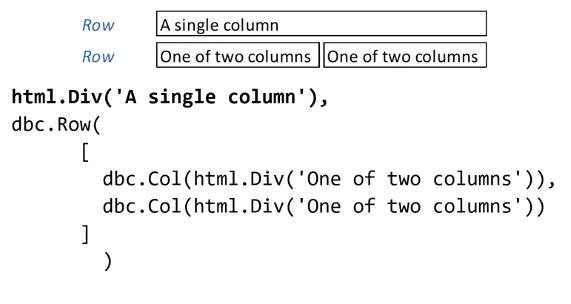

In [ ]:
import dash_bootstrap_components as dbc

In [165]:
from dash import Dash, html, dcc, Input, Output
import pandas as pd
import plotly.express as px
import dash_bootstrap_components as dbc

data = pd.read_csv('world_happiness.csv')


#Instantiate a Dash object 
app = Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

#Defining the Layout part 


#line_fig = px.line(data[data['country']== data['country'].unique()[0]], x ='year', y = 'happiness_score', title = 'Happiness Score')

app.layout = html.Div([
    html.H1('Happiness Dashboard', 
            style = {'textAlign':'center',
                     'fontFamily':'fantasy',
                     'fontSize':50,
                     'color' : 'green'}),
    html.P([
            html.Br(),
            html.A(children= 'Source Dataset',
                href = 'https://dash.plotly.com/dash-in-jupyter',
                target = '_blank')]),#this is to open a new webpage when the link is clicked 
    dcc.RadioItems(id = 'region_radio', options= data['region'].unique(), value = 'North America'),
    html.Br(),
    dbc.Row([
        dbc.Col(dcc.Dropdown( id = 'country_dropdown')),
        dbc.Col(dcc.RadioItems(id = 'Score_type', options={#previously we use a list to define the options, but it is also possible to do it with dictionaries
                'happiness_score': 'Happines Score',
                'happiness_rank' : 'Happiness Rank'}, value='happiness_score' ))
    
]),
    
    
    html.Br(),
                                            
    dcc.Graph(id = 'Graph'),
    html.Div(id='avarage-div')
     ])

@app.callback(
    Output(component_id='country_dropdown', component_property= 'options'),
    Output(component_id = 'country_dropdown', component_property = 'value'),
    Input(component_id='region_radio', component_property= 'value' )      
) 
def update_dropdown(selected_region):
    filtered_data = data[data['region']== selected_region] 
    country_options = filtered_data['country'].unique()
    return country_options, country_options[0]


@app.callback(
    Output(component_id='Graph', component_property= 'figure'),
    Output(component_id = 'avarage-div', component_property = 'children'),
    Input(component_id='country_dropdown', component_property= 'value' ),
    Input(component_id= 'Score_type', component_property= 'value')
)
def update_graph(country, selected_score):
    filtered_data = data[data['country']== country]
    figure = px.line(filtered_data, x ='year', y=selected_score,
                     title = f'{selected_score} in {country}')
    selected_avarage = filtered_data[selected_score].mean()
    return figure, f'The avarge {selected_score} selected_avarage for {country} is {selected_avarage}'

In [166]:
app.run(jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/


## Custominzing with inline CSS

- **CSS(Cascading Style Sheets)**: It describes how the HTML elements are displayed including colors, fonts layout and more. 

- It allows the sepration of style formatting and content
    - HTML -> describe the content 
    - CSS -> format the style 

The basic CSS syntax includes two main parts: 

- **The element selctor**: It is use to point the elemts to style, such as:
    - es. Select all h3 HTML elemts 
    - es. Select the HTML element with a certain id  
- **The Delcaration block:** declares a list of style properties by their names and values 

Example, if we want to style all the H1 HTML elemts to have center text alignment and clolor blue 

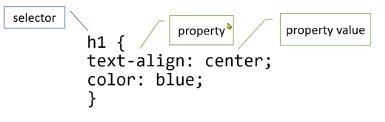



In [192]:
from dash import Dash, html, dcc, Input, Output
import pandas as pd
import plotly.express as px
import dash_bootstrap_components as dbc

data = pd.read_csv('world_happiness.csv')


#Instantiate a Dash object 
app = Dash()

#Defining the Layout part 

app.layout = html.Div([
    html.H1('Happiness Dashboard', 
            style = {'textAlign':'center',
                     'fontFamily':'fantasy',
                     'fontSize':50,
                     'color' : 'green'}),
    html.P([
                     html.Br(),
                     html.A(children= 'Source Dataset',
                            href = 'https://dash.plotly.com/dash-in-jupyter',
                            target = '_blank')]),#this is to open a new webpage when the link is clicked 
    dcc.RadioItems(id = 'region_radio', options= data['region'].unique(), value = 'North America'),
    html.Br(),
    dcc.Dropdown( id = 'country_dropdown'), #we remove options and value becuse they will be automatically assigned by the callback function. 
    html.Br(),
    dcc.RadioItems(id = 'Score_type', options={#previously we use a list to define the options, but it is also possible to do it with dictionaries
        'happiness_score': 'Happines Score',
        'happiness_rank' : 'Happiness Rank'}, value='happiness_score' ),                                         
    dcc.Graph(id = 'Graph'),
    html.Div(id='avarage-div')
     ])

@app.callback(
    Output(component_id='country_dropdown', component_property= 'options'),
    Output(component_id = 'country_dropdown', component_property = 'value'),
    Input(component_id='region_radio', component_property= 'value' )      
) 
def update_dropdown(selected_region):
    filtered_data = data[data['region']== selected_region] 
    country_options = filtered_data['country'].unique()
    return country_options, country_options[0]


@app.callback(
    Output(component_id='Graph', component_property= 'figure'),
    Output(component_id = 'avarage-div', component_property = 'children'),
    Input(component_id='country_dropdown', component_property= 'value' ),
    Input(component_id= 'Score_type', component_property= 'value')
)
def update_graph(country, selected_score):
    filtered_data = data[data['country']== country]
    figure = px.line(filtered_data, x ='year', y=selected_score,
                     title = f'{selected_score} in {country}')
    selected_avarage = filtered_data[selected_score].mean()
    return figure, f'The avarge {selected_score} selected_avarage for {country} is {selected_avarage}'

In [193]:
app.run(jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/


### External CSS style sheets

Besides inline styling, another way of styling with CSS in dash is using external style sheets, by setting the parameter external style sheets in the class dash we can change the style of the entire app.



Example 

`external_stylesheets = ['CSS_URL']` where the URL contain a CSS file created by the dash developer.
`app = Dash(external_stylesheets=external_stylesheets)`

Another way of usign external CSS styles is  by importing the library `dash_bootstrap_components`. Within the package there are some urls to prebuild CSS style sheets.


In [194]:
from dash import Dash, html, dcc, Input, Output
import pandas as pd
import plotly.express as px
import dash_bootstrap_components as dbc

data = pd.read_csv('world_happiness.csv')


#Instantiate a Dash object 
app = Dash(external_stylesheets=[dbc.themes.SKETCHY])


#Defining the Layout part 

app.layout = html.Div([
    html.H1('Happiness Dashboard', 
            style = {'textAlign':'center',
                     'fontFamily':'fantasy',
                     'fontSize':50,
                     'color' : 'green'}),
  
    dcc.RadioItems(id = 'region_radio', options= data['region'].unique(), value = 'North America'),
    html.Br(),
    dcc.Dropdown( id = 'country_dropdown'), #we remove options and value becuse they will be automatically assigned by the callback function. 
    html.Br(),
    dcc.RadioItems(id = 'Score_type', options={#previously we use a list to define the options, but it is also possible to do it with dictionaries
        'happiness_score': 'Happines Score',
        'happiness_rank' : 'Happiness Rank'}, value='happiness_score' ),                                         
    dcc.Graph(id = 'Graph'),
    html.Div(id='avarage-div')
     ])

@app.callback(
    Output(component_id='country_dropdown', component_property= 'options'),
    Output(component_id = 'country_dropdown', component_property = 'value'),
    Input(component_id='region_radio', component_property= 'value' )      
) 
def update_dropdown(selected_region):
    filtered_data = data[data['region']== selected_region] 
    country_options = filtered_data['country'].unique()
    return country_options, country_options[0]


@app.callback(
    Output(component_id='Graph', component_property= 'figure'),
    Output(component_id = 'avarage-div', component_property = 'children'),
    Input(component_id='country_dropdown', component_property= 'value' ),
    Input(component_id= 'Score_type', component_property= 'value')
)
def update_graph(country, selected_score):
    filtered_data = data[data['country']== country]
    figure = px.line(filtered_data, x ='year', y=selected_score,
                     title = f'{selected_score} in {country}')
    selected_avarage = filtered_data[selected_score].mean()
    return figure, f'The avarge {selected_score} selected_avarage for {country} is {selected_avarage}'

In [195]:
app.run(jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/


## Navigation Bar



In [79]:
from dash import Dash, html, dcc, Input, Output
import pandas as pd
import plotly.express as px
import dash_bootstrap_components as dbc

data = pd.read_csv('world_happiness.csv')

navbar = dbc.NavbarSimple(
    brand = 'Happiness Dashboard',
    children = [
        html.A(children= 'Source Dataset',
                            href = 'https://dash.plotly.com/dash-in-jupyter',
                            target = '_blank')],#this is to open a new webpage when the link is clicked
    color = '#84b369',
    fluid = True #thank to this the specified elemetns will fill the available horizontal space 
    )

#Instantiate a Dash object 
app = Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])


#Defining the Layout part 


app.layout = html.Div([
    navbar,
    html.H1('Happiness Dashboard', 
            style = {'textAlign':'center',
                     'fontFamily':'fantasy',
                     'fontSize':50,
                     'color' : 'green'}),
  
    dcc.RadioItems(id = 'region_radio', options= data['region'].unique(), value = 'North America'),
    html.Br(),
    dcc.Dropdown( id = 'country_dropdown'), #we remove options and value becuse they will be automatically assigned by the callback function. 
    html.Br(),
    dcc.RadioItems(id = 'Score_type', options={#previously we use a list to define the options, but it is also possible to do it with dictionaries
        'happiness_score': 'Happines Score',
        'happiness_rank' : 'Happiness Rank'}, value='happiness_score' ),                                         
    dcc.Graph(id = 'Graph'),
    html.Div(id='avarage-div')
     ])

@app.callback(
    Output(component_id='country_dropdown', component_property= 'options'),
    Output(component_id = 'country_dropdown', component_property = 'value'),
    Input(component_id='region_radio', component_property= 'value' )      
) 
def update_dropdown(selected_region):
    filtered_data = data[data['region']== selected_region] 
    country_options = filtered_data['country'].unique()
    return country_options, country_options[0]


@app.callback(
    Output(component_id='Graph', component_property= 'figure'),
    Output(component_id = 'avarage-div', component_property = 'children'),
    Input(component_id='country_dropdown', component_property= 'value' ),
    Input(component_id= 'Score_type', component_property= 'value')
)
def update_graph(country, selected_score):
    filtered_data = data[data['country']== country]
    figure = px.line(filtered_data, x ='year', y=selected_score,
                     title = f'{selected_score} in {country}')
    selected_avarage = filtered_data[selected_score].mean()
    return figure, f'The avarge {selected_score} selected_avarage for {country} is {selected_avarage}'

In [80]:
app.run(jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/


### Deck of Cards

In [123]:
from dash import Dash, html, dcc, Input, Output
import pandas as pd
import plotly.express as px
import dash_bootstrap_components as dbc

data = pd.read_csv('world_happiness.csv')

navbar = dbc.NavbarSimple(
    brand = 'Happiness Dashboard',
    children = [
        html.A(children= 'Source Dataset',
                            href = 'https://dash.plotly.com/dash-in-jupyter',
                            target = '_blank')],#this is to open a new webpage when the link is clicked
    color = '#84b369',
    fluid = True #thank to this the specified elemetns will fill the available horizontal space 
    )


cards = dbc.Row([
    dbc.Col(
        dbc.Card([
            html.H4('Current Ranking'),
            html.H5('Rank', id = 'card_1')],
            body = True,
            style = {'textAlign': 'center', 'color':'white'},
            color = 'lightblue')
        ),
    dbc.Col(
        dbc.Card([
            html.H4('Happines Score'),
            html.H5("Score",  id = 'card_2')],
            body = True,
            style = {'textAlign': 'center', 'color':'white'},
            color = 'blue')
        ),
    dbc.Col(
        dbc.Card([
            html.H4('Year'),
            html.H5("bho",  id = 'card_3')],
            body = True,
            style = {'textAlign': 'center', 'color':'white'}, 
            color = 'blue')
        )
])

#Instantiate a Dash object 
app = Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])


#Defining the Layout part 


app.layout = html.Div([
    navbar,
    html.H1('Happiness Dashboard', 
            style = {'textAlign':'center',
                     'fontFamily':'fantasy',
                     'fontSize':50,
                     'color' : 'green'}),
    html.Br(),
    dcc.RadioItems(id = 'region_radio', options= data['region'].unique(), value = 'North America',
                   inputStyle={'margin-right': '10px', 'margin-left': '10px'},  # Add spacing between items
                   style={'display': 'flex', 'flex-wrap': 'wrap'} ),
    html.Br(),
    dcc.Dropdown( id = 'country_dropdown'), #we remove options and value becuse they will be automatically assigned by the callback function. 
    html.Br(),
    dcc.RadioItems(id = 'Score_type', options={#previously we use a list to define the options, but it is also possible to do it with dictionaries
                                                'happiness_score': 'Happines Score',
                                                'happiness_rank' : 'Happiness Rank'}, 
        value='happiness_score'),                                         
    dcc.Graph(id = 'Graph'),
    html.Div(id='avarage-div'),
    cards

     ])

@app.callback(
    Output(component_id='country_dropdown', component_property= 'options'),
    Output(component_id = 'country_dropdown', component_property = 'value'),
    Input(component_id='region_radio', component_property= 'value' )      
) 
def update_dropdown(selected_region):
    filtered_data = data[data['region']== selected_region] 
    country_options = filtered_data['country'].unique()
    return country_options, country_options[0]


@app.callback(
    Output(component_id='Graph', component_property= 'figure'),
    Output(component_id = 'card_1', component_property = 'children'),
    Output(component_id = 'card_2', component_property = 'children'),
    Output(component_id = 'card_3', component_property = 'children'),
    Input(component_id='country_dropdown', component_property= 'value' ),
    Input(component_id= 'Score_type', component_property= 'value')
)
def update_graph(country, selected_score):
    filtered_data = data[data['country']== country]
    figure = px.line(filtered_data, x ='year', y=selected_score,
                     title = f'{selected_score} in {country}')
    rank = filtered_data['happiness_rank'].iloc[-1]
    score = filtered_data['happiness_score'].iloc[-1]
    year = filtered_data['year'].iloc[-1]
    return figure, f'#{rank}', f'{score}pt.', f'{year}'

In [124]:
app.run(jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/


### Tabs

In [175]:
from dash import Dash, html, dcc, Input, Output, dash_table
import pandas as pd
import plotly.express as px
import dash_bootstrap_components as dbc
from dash.dash_table import DataTable

data = pd.read_csv('world_happiness.csv')

navbar = dbc.NavbarSimple(
    brand = 'Happiness Dashboard',
    children = [
        html.A(children= 'Source Dataset',
                            href = 'https://dash.plotly.com/dash-in-jupyter',
                            target = '_blank')],#this is to open a new webpage when the link is clicked
    color = '#84b369',
    fluid = True #thank to this the specified elemetns will fill the available horizontal space 
    )


cards = dbc.Row([
    dbc.Col(
        dbc.Card([
            html.H4('Current Ranking'),
            html.H5('Rank', id = 'card_1')],
            body = True,
            style = {'textAlign': 'center', 'color':'white'},
            color = 'lightblue')
        ),
    dbc.Col(
        dbc.Card([
            html.H4('Happines Score'),
            html.H5("Score",  id = 'card_2')],
            body = True,
            style = {'textAlign': 'center', 'color':'white'},
            color = 'blue')
        ),
    dbc.Col(
        dbc.Card([
            html.H4('Year'),
            html.H5("bho",  id = 'card_3')],
            body = True,
            style = {'textAlign': 'center', 'color':'white'}, 
            color = 'blue')
        )
])

unique_years = sorted(data['year'].unique())
table =  [dcc.Dropdown(
            id='year-filter',
            options=[{'label': year, 'value': year} for year in unique_years],
            value=unique_years[0],  # Default to the first year
            style={'width': '50%'}
            ), 
        html.Div([
            html.H3("Happiness Data Table", style={'textAlign': 'center'}),
            DataTable(
            id='data-table',
            columns=[{"name": col, "id": col} for col in data.columns],
            style_table={'overflowX': 'auto'},
            style_cell={
                'textAlign': 'left',
                'padding': '10px',
                'backgroundColor': '#f9f9f9'
            },
            style_header={
                'backgroundColor': '#84b369',
                'fontWeight': 'bold',
                'color': 'white',
                'textAlign': 'center'
            }
        )
    ], style={'margin': '20px'})]


#Instantiate a Dash object 
app = Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

##################################################################
#Defining the Layout part 
##################################################################

app.layout = html.Div([
    navbar,
    html.H1('Happiness Dashboard', 
            style = {'textAlign':'center',
                     'fontFamily':'fantasy',
                     'fontSize':50,
                     'color' : 'green'}),
    html.Br(),    
    dcc.RadioItems(id = 'region_radio', options= data['region'].unique(), value = 'North America',
                   inputStyle={'margin-right': '10px', 'margin-left': '10px'},  # Add spacing between items
                   style={'display': 'flex', 'flex-wrap': 'wrap'} ),
    html.Br(),
    dcc.Dropdown( id = 'country_dropdown', style={'width': '50%'}), #we remove options and value becuse they will be automatically assigned by the callback function. 
    html.Br(),
    dcc.RadioItems(id = 'Score_type', options={#previously we use a list to define the options, but it is also possible to do it with dictionaries
                                                'happiness_score': 'Happines Score',
                                                'happiness_rank' : 'Happiness Rank'}, 
        value='happiness_score'),

    dcc.Tabs([
        dcc.Tab(label ='Graph', children = [dcc.Graph(id = 'Graph'), cards]),
        dcc.Tab(label='Table', children=table)
    ])                                         
 

     ])


##########################################
# CALLBACKS
##########################################

@app.callback(
    Output(component_id='country_dropdown', component_property= 'options'),
    Output(component_id = 'country_dropdown', component_property = 'value'),
    Input(component_id='region_radio', component_property= 'value' )      
) 
def update_dropdown(selected_region):
    filtered_data = data[data['region']== selected_region] 
    country_options = filtered_data['country'].unique()
    return country_options, country_options[0]


@app.callback(
    Output(component_id='Graph', component_property= 'figure'),
    Output(component_id = 'card_1', component_property = 'children'),
    Output(component_id = 'card_2', component_property = 'children'),
    Output(component_id = 'card_3', component_property = 'children'),
    Input(component_id='country_dropdown', component_property= 'value' ),
    Input(component_id= 'Score_type', component_property= 'value')
)
def update_graph(country, selected_score):
    filtered_data = data[data['country']== country]
    figure = px.line(filtered_data, x ='year', y=selected_score,
                     title = f'{selected_score} in {country}')
    rank = filtered_data['happiness_rank'].iloc[-1]
    score = filtered_data['happiness_score'].iloc[-1]
    year = filtered_data['year'].iloc[-1]
    return figure, f'#{rank}', f'{score}pt.', f'{year}'

@app.callback(
    Output('data-table', 'data'),
    Input('year-filter', 'value')
)
def update_table(selected_year):
    filtered_data = data[data['year'] == selected_year]
    sorted_data = filtered_data.sort_values(by='happiness_rank')
    return sorted_data.to_dict('records')

In [176]:
app.run(jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/


### Style Improvment

In [197]:
from dash import Dash, html, dcc, Input, Output, dash_table
import pandas as pd
import plotly.express as px
import dash_bootstrap_components as dbc
from dash.dash_table import DataTable

# Load the dataset
data = pd.read_csv('world_happiness.csv')

# Navbar
navbar = dbc.NavbarSimple(
    brand="Happiness Dashboard",
    children=[
        html.A("Source Dataset", href="https://dash.plotly.com/dash-in-jupyter", target="_blank")
    ],
    color="#4CAF50",  # A pleasant green
    dark=True,
    fluid=True
)

# Cards for displaying stats
cards = dbc.Row(
    [
        dbc.Col(
            dbc.Card(
                dbc.CardBody([
                    html.H4("Current Ranking", className="card-title"),
                    html.H5("Rank", id="card_1", className="card-text")
                ]),
                style={"textAlign": "center", "backgroundColor": "#e3f2fd", "color": "#0277bd", "boxShadow": "2px 2px 5px #ccc"},
            ),
            width=4
        ),
        dbc.Col(
            dbc.Card(
                dbc.CardBody([
                    html.H4("Happiness Score", className="card-title"),
                    html.H5("Score", id="card_2", className="card-text")
                ]),
                style={"textAlign": "center", "backgroundColor": "#bbdefb", "color": "#0d47a1", "boxShadow": "2px 2px 5px #ccc"},
            ),
            width=4
        ),
        dbc.Col(
            dbc.Card(
                dbc.CardBody([
                    html.H4("Year", className="card-title"),
                    html.H5("Year", id="card_3", className="card-text")
                ]),
                style={"textAlign": "center", "backgroundColor": "#90caf9", "color": "#1565c0", "boxShadow": "2px 2px 5px #ccc"},
            ),
            width=4
        ),
    ],
    className="mb-4"
)

# Table with Year Filter
unique_years = sorted(data['year'].unique())
table = html.Div([
    html.Div([
        html.Label("Filter by Year:", style={"fontSize": "16px", "fontWeight": "bold"}),
        dcc.Dropdown(
            id="year-filter",
            options=[{'label': year, 'value': year} for year in unique_years],
            value=unique_years[0],
            style={'width': '50%', 'margin': 'auto'}
        )
    ], className="mb-3"),

    html.H3("Happiness Data Table", style={'textAlign': 'center', 'color': '#2e7d32'}),
    DataTable(
        id="data-table",
        columns=[{"name": col, "id": col} for col in data.columns],
        style_table={'overflowX': 'auto'},
        style_cell={
            'textAlign': 'left',
            'padding': '10px',
            'backgroundColor': '#f1f8e9'
        },
        style_header={
            'backgroundColor': '#4CAF50',
            'fontWeight': 'bold',
            'color': 'white',
            'textAlign': 'center'
        }
    )
])

# Initialize the app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Layout
app.layout = html.Div([
    navbar,
    html.Div([
        html.H1("Happiness Dashboard", style={"textAlign": "center", "fontFamily": "sans-serif", "color": "#388e3c", "marginBottom": "20px"}),
        dcc.RadioItems(
            id="region_radio",
            options=[{'label': region, 'value': region} for region in data['region'].unique()],
            value='North America',
            inputStyle={'margin-right': '10px', 'margin-left': '10px'},
            style={'display': 'flex', 'flex-wrap': 'wrap', 'justify-content': 'center'}
        ),
        html.Br(),
        dcc.Dropdown(id="country_dropdown", style={"width": "60%", "margin": "auto"}),
        html.Br(),
        dcc.RadioItems(
            id="Score_type",
            options={
                'happiness_score': 'Happiness Score',
                'happiness_rank': 'Happiness Rank'
            },
            value='happiness_score',
            style={"textAlign": "center", "marginBottom": "20px"}
        )
    ], className="p-3"),

    dcc.Tabs([
        dcc.Tab(label="Graph", children=[
            html.Div([
                dcc.Graph(id="Graph"),
                cards
            ], className="p-4")
        ]),
        dcc.Tab(label="Table", children=table, className="p-4")
    ])
], style={"backgroundColor": "#f7f7f7", "padding": "20px"})

# Callbacks
@app.callback(
    Output("country_dropdown", "options"),
    Output("country_dropdown", "value"),
    Input("region_radio", "value")
)
def update_dropdown(selected_region):
    filtered_data = data[data['region'] == selected_region]
    country_options = [{'label': country, 'value': country} for country in filtered_data['country'].unique()]
    return country_options, filtered_data['country'].unique()[0]


@app.callback(
    Output("Graph", "figure"),
    Output("card_1", "children"),
    Output("card_2", "children"),
    Output("card_3", "children"),
    Input("country_dropdown", "value"),
    Input("Score_type", "value")
)
def update_graph(country, selected_score):
    filtered_data = data[data['country'] == country]
    figure = px.line(filtered_data, x='year', y=selected_score, title=f'{selected_score.capitalize()} in {country}')
    rank = filtered_data['happiness_rank'].iloc[-1]
    score = filtered_data['happiness_score'].iloc[-1]
    year = filtered_data['year'].iloc[-1]
    return figure, f'#{rank}', f'{score} pt.', f'{year}'


@app.callback(
    Output("data-table", "data"),
    Input("year-filter", "value")
)
def update_table(selected_year):
    filtered_data = data[data['year'] == selected_year]
    sorted_data = filtered_data.sort_values(by='happiness_rank')
    return sorted_data.to_dict('records')



In [198]:
app.run(jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/
